### Importing Necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
data=pd.read_csv('heart.csv')

### Getting the data

### EDA and Visualisation

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum().sum()

0

### There are no NaN or Null value in the dataset

In [5]:
data.shape

(303, 14)

### dataset has 303 Rows (Observations) and 14 Columns (features including Target variable)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Basic information about the dataset

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Counting the target variable. (seems like binary classification)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B96CA900F0>,
      dtype=object)

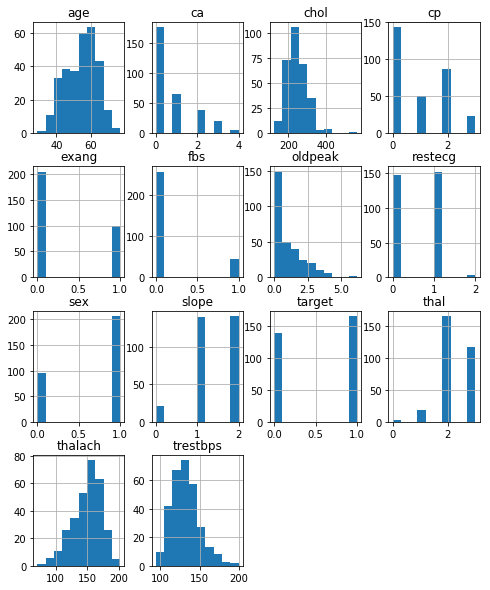

In [8]:
data.hist(figsize=(8,10))

### Through this we can see that there are few continous value among many discrete ones. Age, Chol, oldpeak, thalach, trestbps are some columns which are continous

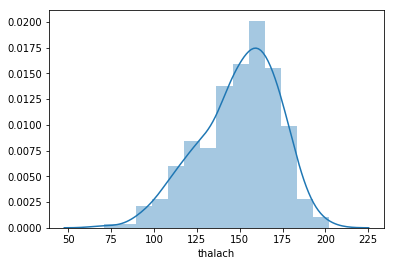

In [9]:
sns.distplot(data.thalach)

### There is a little negative skewness in thalach

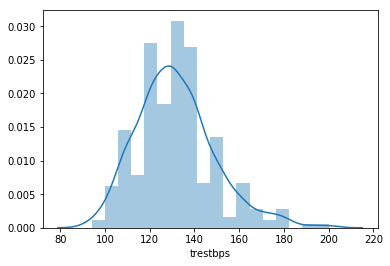

In [10]:
sns.distplot(data.trestbps)

### Though it looks normal, it has some positive skewness

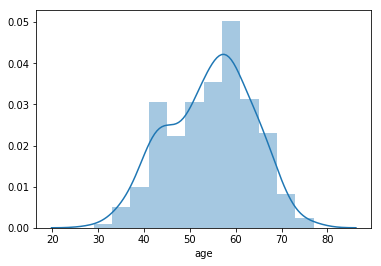

In [11]:
sns.distplot(data.age)

### it is acceptable as normal distribution

In [12]:
def countplot_annotate(df):
    ax=sns.countplot(df)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+1))

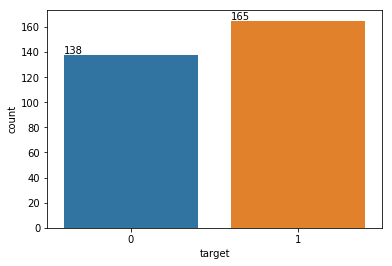

In [13]:
countplot_annotate(data.target)

### there are 138 observation of Disease being NOT present, while 165 observation with disease Present

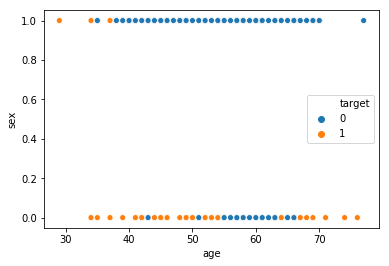

In [14]:
sns.scatterplot(data.age,data.sex,hue=data.target)

### the heart disease doesnot comes with the age, as we can see the target variable is present for almost all the age and not a specific group of age
### Also we can see that Sex 0, that means Females usually have more heart disease than Male

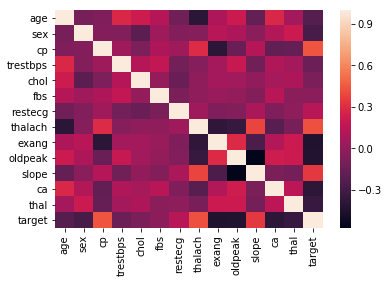

In [15]:
sns.heatmap(data.corr())

### We can see that cp and thalach , thalach and slope, trestbps and age have some correlation among them, but it is not very much correlated

In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer,scale

In [18]:
X=data.loc[:,['age', 'sex', 'cp', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=data.target

In [19]:
ss=StandardScaler()
norm=Normalizer()

In [20]:
X=ss.fit_transform(X)
X=scale(X)
X=norm.fit_transform(X)

C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Standardising, Normalising and Scaling

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=1,stratify=y)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model_lr=LogisticRegression(C=1,verbose=10,max_iter=20,n_jobs=5,random_state=20)

### Using Logistic Regression algorithm

In [24]:
model_lr.fit(X_train,y_train)

[LibLinear]

C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='warn', n_jobs=5,
          penalty='l2', random_state=20, solver='warn', tol=0.0001,
          verbose=10, warm_start=False)

In [25]:
y_pred=model_lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.87

In [28]:
pd.crosstab(y_test,y_pred)

col_0,0,1
target,,
0,38,8
1,5,49
